<a href="https://colab.research.google.com/github/heldhaayu/tesBNSP-CustomerChurn/blob/main/BNSP_Customers_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUJUAN BISNIS : untuk memprediksi customer churn

ATRIBUT:
1. customerID: Customer ID predictor
2. gender: Whether the customer is a male or a female predictor
3. SeniorCitizen: Whether the customer is a senior citizen or not
4. Partner: Whether the customer has a partner or not
5. Dependents :Whether the customer has dependents or not
6. tenure: Number of months the customer has stayed with the company predictor
7. PhoneService: Whether the customer has a phone service or not
8. MultipleLines: Whether the customer has multiple lines or not
9. InternetService:  Customer’s internet service provider
10. OnlineSecurity: Whether the customer has online security or not
11. OnlineBackup: Whether the customer has online backup or not
12. DeviceProtection: Whether the customer has device protection or not
13. TechSupport: Whether the customer has tech support or not
14. StreamingTV: Whether the customer has streaming TV or not
15. StreamingMovies: Whether the customer has streaming movies or not
16. Contract
; The contract : term of the customer
17. PaperlessBilling: Whether the customer has paperless billing
18. PaymentMethod:The customer’s payment method
19. MonthlyCharges: The amount charged to the customer monthly predictor
20. TotalCharges: The total amount charged to the customer predictor
21. Churn : Whether the customer churned or not

In [ ]:
#impport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import statistics

In [ ]:
#setelah itu selanjutnya adalah panggil data pada folder laptop
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (8).csv


In [ ]:
#tampilkan data yang sudah dipanggil tadi
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
# untuk mengetahui informasi rinci pada dataset atau DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

DATA TRANSFORMATION

In [ ]:
# mengisi nilai yang kosong dengan NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# konversi object ke float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df['gender'].value_counts()

Male      3550
Female    3483
M            3
F            2
Name: gender, dtype: int64

In [ ]:
# standardisasi nilai data 'gender'
df['gender'] = df['gender'].str.replace('Female', 'F')
df['gender'] = df['gender'].str.replace('Male', 'M')

In [ ]:
df['gender'].value_counts()

M    3553
F    3485
Name: gender, dtype: int64

Data pada atribut gender, terdapat nilai yang tidak konsisten, yaitu terdapat nilai 'Female', 'F', 'Male' dan 'M'. Oleh karena itu, perlu dilakukan standardisasi untuk memudahkan pemahaman data, nilai 'Female' akan diubah menjadi 'F' dan nilai 'Male' akan diubah menjadi 'M'.

In [ ]:
#konversi int ke object
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Mengubah tipe data 'SeniorCitizen' menjadi object 'Yes' untuk 1 dan 'No' untuk 0 dan 'TotalCharges' menjadi float, hal ini dilakukan untuk mempermudah pemahaman data.

DATA CLEANING

In [ ]:
df.isnull().sum()

customerID           0
gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

tidak ada duplicate

In [ ]:
#menghapus kolom customerID karena tidak perlu digunakan
df1.drop(columns=['customerID'], inplace=True)

<ipython-input-464-98af78788c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['customerID'], inplace=True)


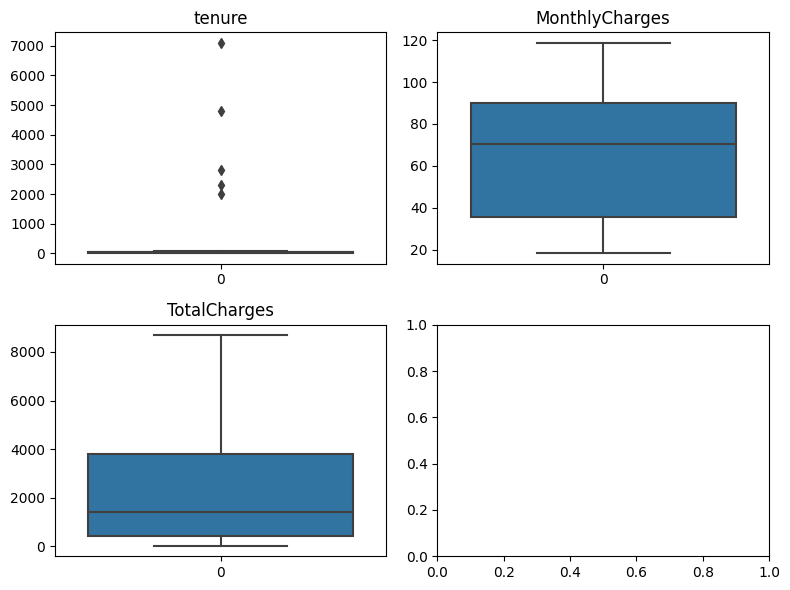

In [ ]:
# Memilih kolom-kolom yang akan ditampilkan dalam boxplot
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Membuat subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
# Menampilkan boxplot untuk setiap kolom yang dipilih
for variable, subplot in zip(selected_columns, ax.flatten()):
    sns.boxplot(df1[variable], ax=subplot)
    subplot.set_title(variable)
# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

handling outlier karena jika tdk di handling dapat mempengarhi data


In [ ]:
#handling outlier
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-466-405624f220f5>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-466-405624f220f5>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-466-405624f220f5>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


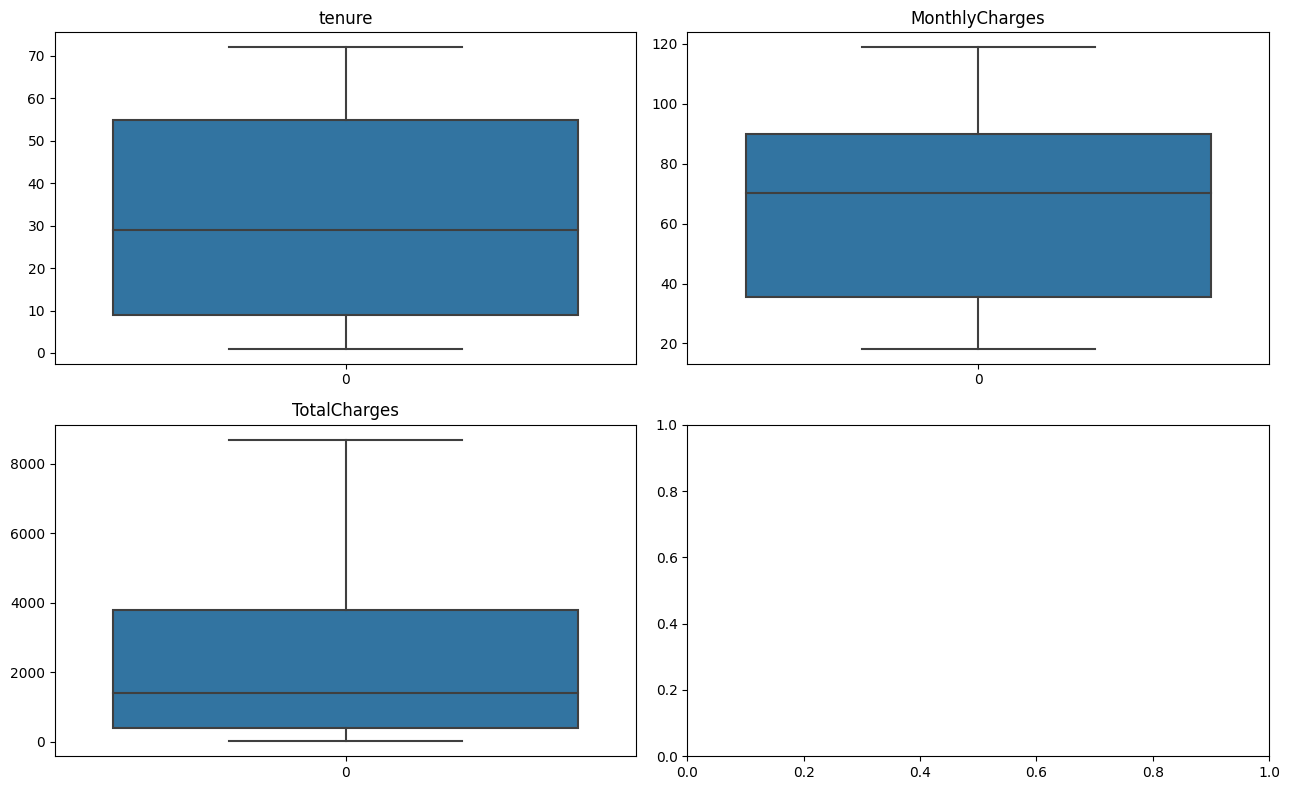

In [ ]:
# Memilih kolom-kolom yang akan ditampilkan dalam boxplot
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Membuat subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
# Menampilkan boxplot untuk setiap kolom yang dipilih
for variable, subplot in zip(selected_columns, ax.flatten()):
    sns.boxplot(df1[variable], ax=subplot)
    subplot.set_title(variable)
# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
df1.shape

(7020, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


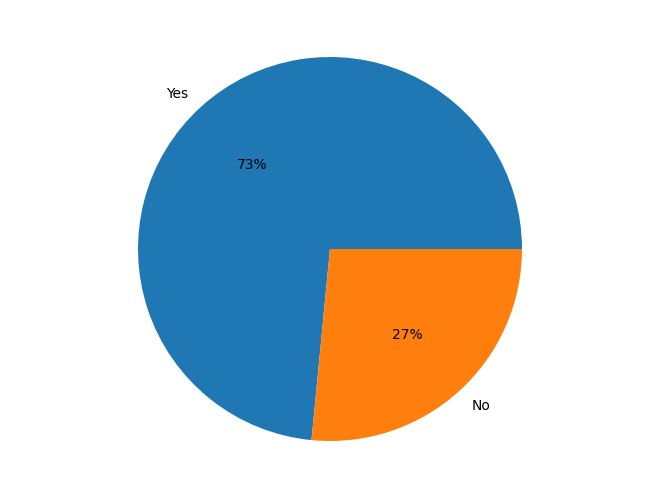

In [ ]:
#Memvisualisasikan Prosentase Chur
from matplotlib import pyplot as plt
import numpy as np
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

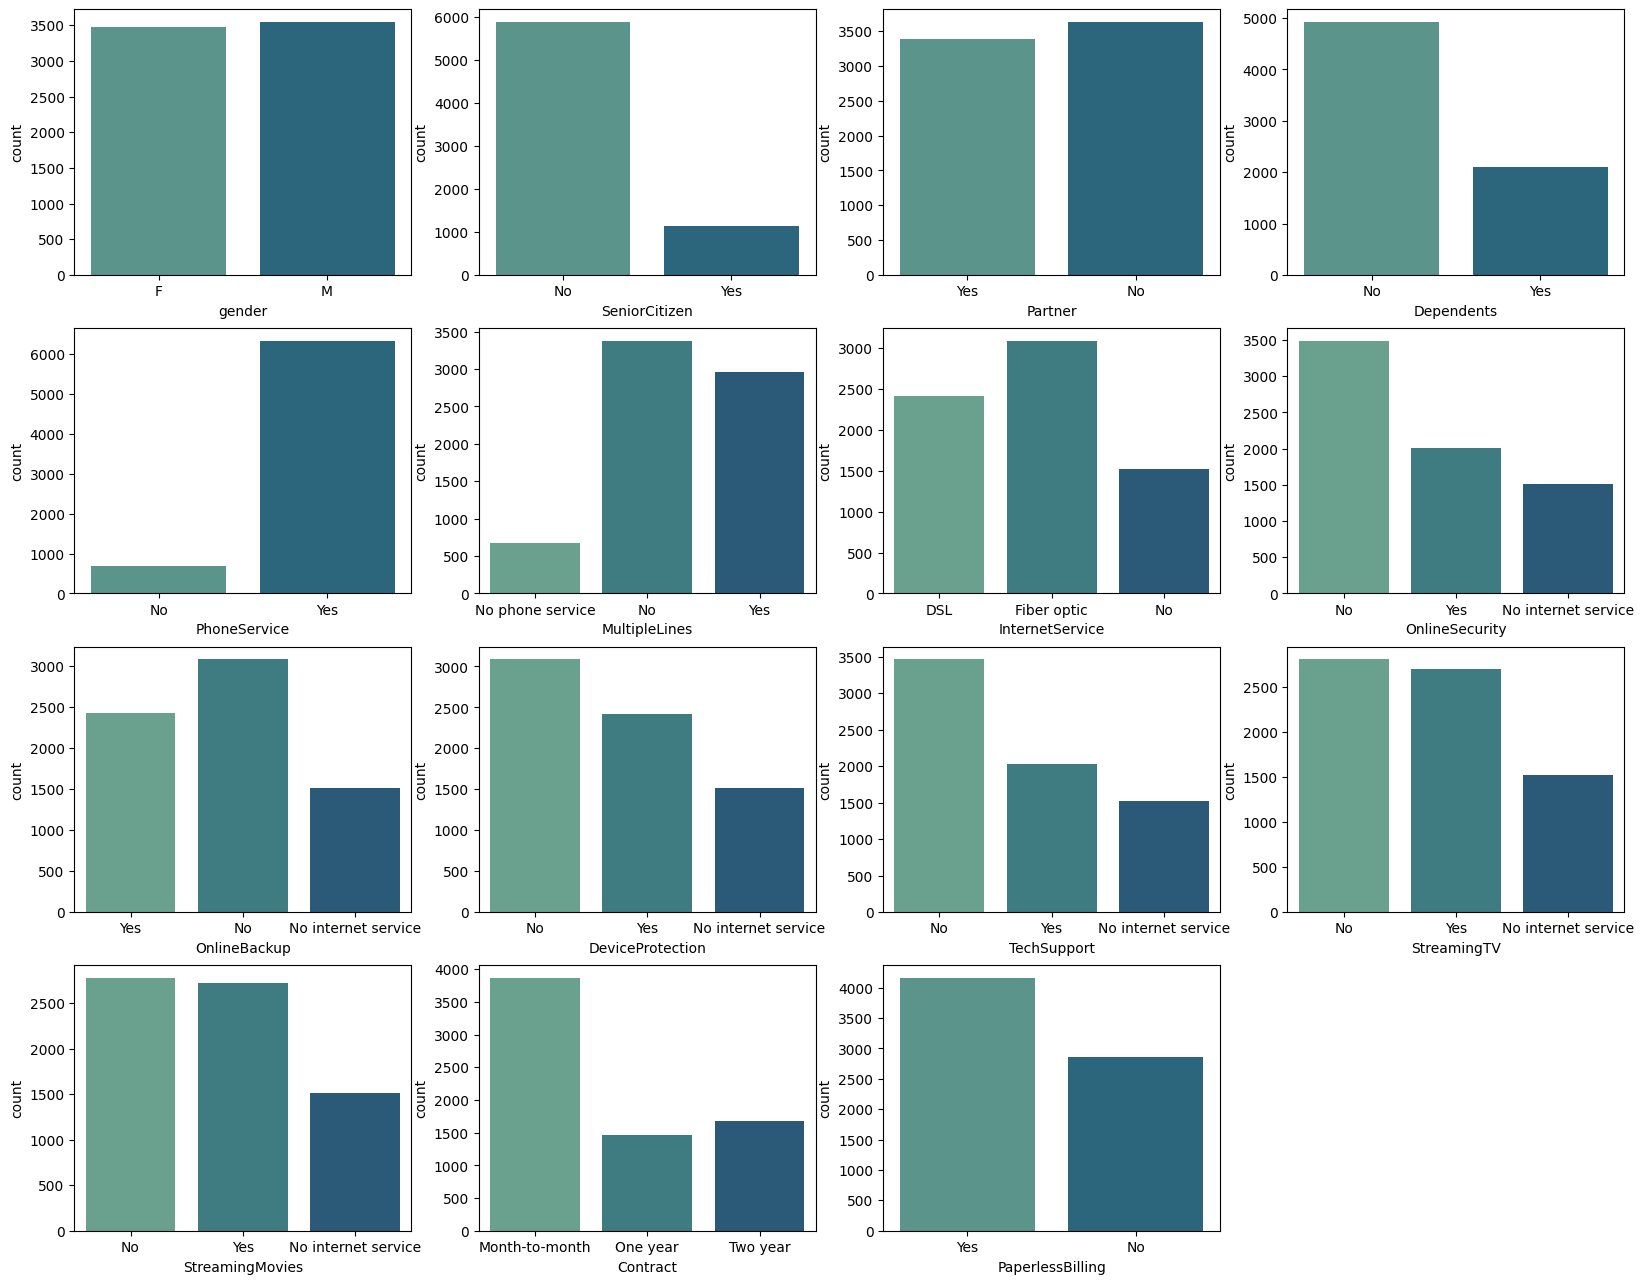

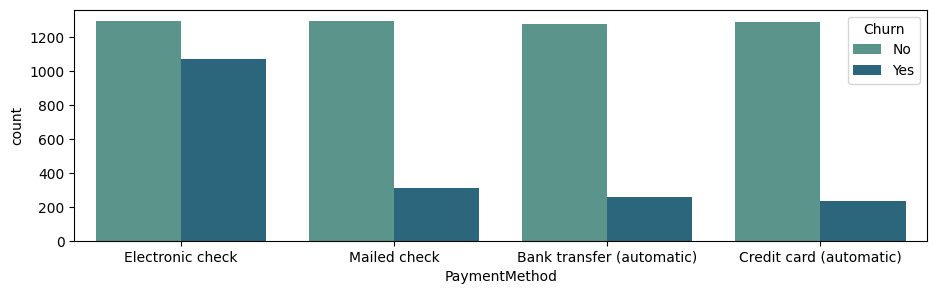

<Figure size 640x480 with 0 Axes>

In [ ]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(20, 20))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df1, x=df1[variable], ax=ax, palette='crest')
plt.show()
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df1, palette='crest')
plt.show()
plt.tight_layout()

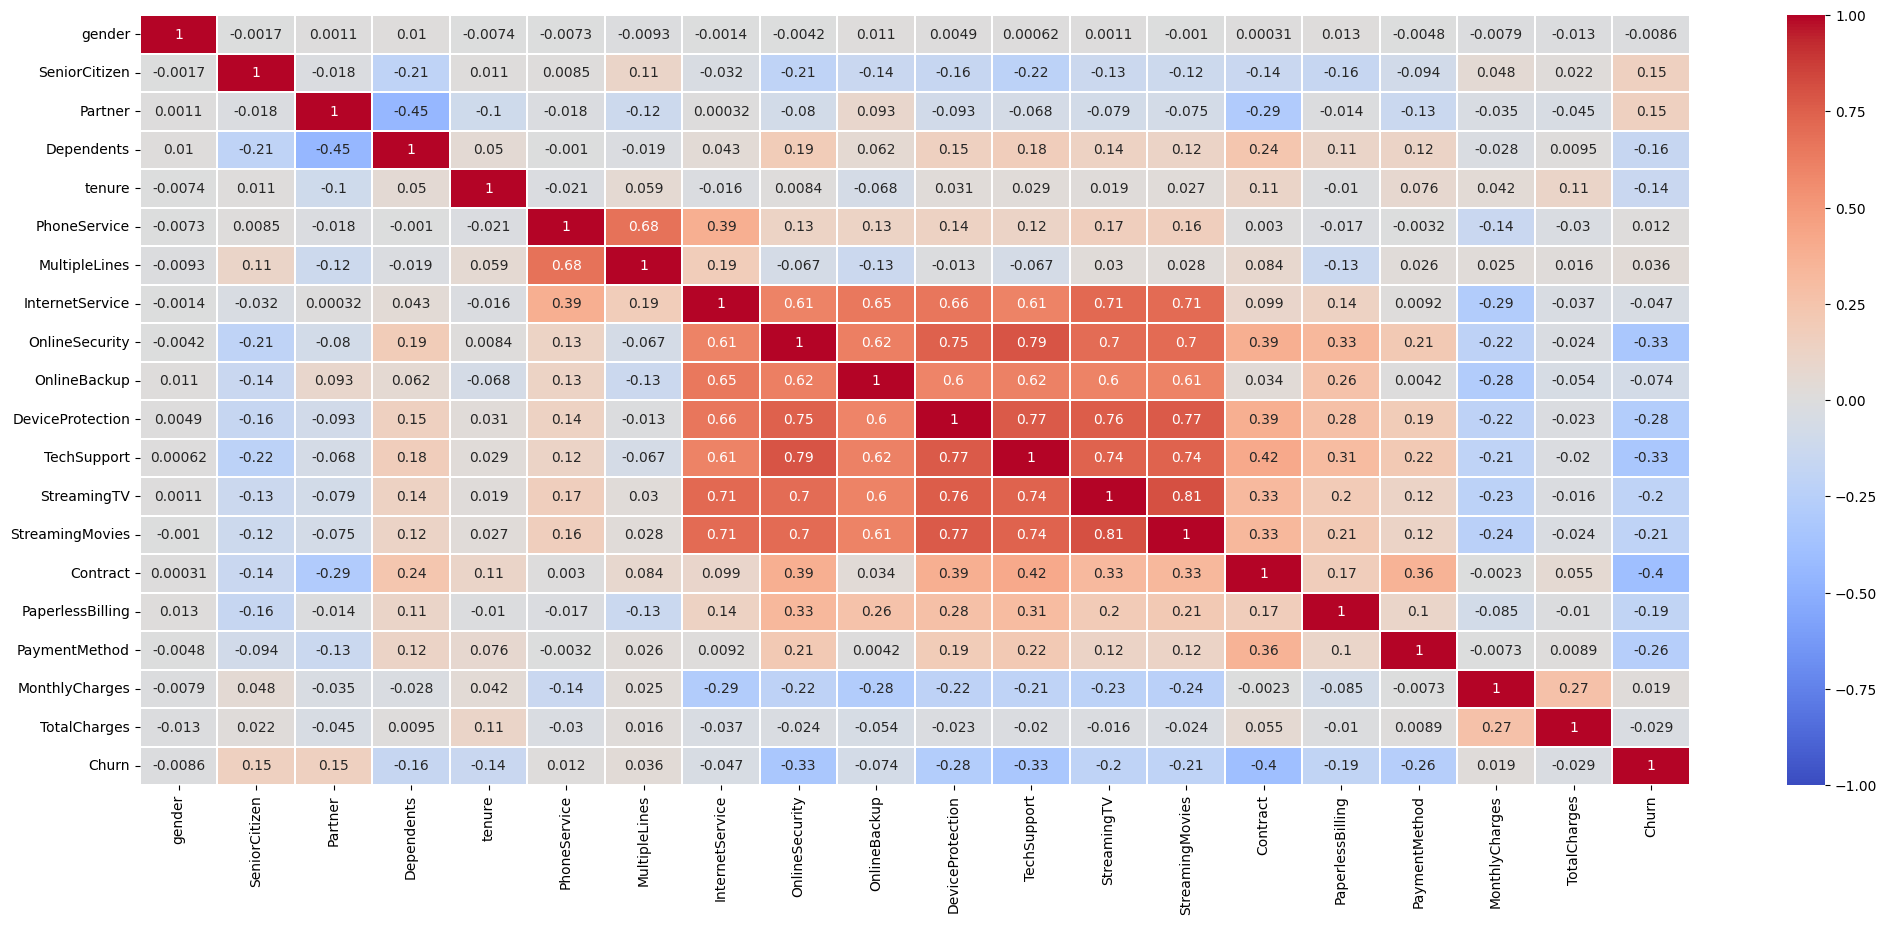

In [ ]:
plt.figure(figsize=(25, 10))
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df1 = df1.apply(lambda x: object_to_int(x))
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


LABELING

In [ ]:
X = df1.drop(columns=['Churn'])
y = df1['Churn']

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7020, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42, stratify=y)

MEMBANGUN MODEL

membuat model untuk menguji empat model klasifikasi: K-Nearest Neighbors (KNN), Decision Tree, Random Forest, dan XGBoost. Hasil dr disimpan dalam knn_pred, dt_pred, rf_pred, dan xgb_pred.

In [ ]:

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

kode dibawah ini untuk mengukur kinerja masing-masing model klasifikasi. sehingga dapat membandingkan model yang paling sesuai dan relevan/yg terbaik

In [ ]:
#K-Nearest Neighbors (KNN)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)

#Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)

#Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)

#XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)

In [ ]:
#memanggil hasil evaluasi
print(f'KNN Accuracy: {knn_accuracy}')
print(f'KNN precision: {knn_precision}')
print(f'KNN recall: {knn_recall}')
print(f'KNN f1 score: {knn_f1}\n')

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree precision: {dt_precision}')
print(f'Decision Tree recall: {dt_recall}')
print(f'Decision Tree f1 score: {dt_f1}\n')

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest precision: {rf_precision}')
print(f'Random Forest recall: {rf_recall}')
print(f'Random Forest f1 score: {rf_f1}\n')

print(f'XGB Accuracy: {xgb_accuracy}')
print(f'XGB precision: {xgb_precision}')
print(f'XGB recall: {xgb_recall}')
print(f'XGB f1 score: {xgb_f1}')

KNN Accuracy: 0.7592592592592593
KNN precision: 0.5660377358490566
KNN recall: 0.40214477211796246
KNN f1 score: 0.4702194357366771

Decision Tree Accuracy: 0.7777777777777778
Decision Tree precision: 0.6320346320346321
Decision Tree recall: 0.3914209115281501
Decision Tree f1 score: 0.48344370860927155

Random Forest Accuracy: 0.7849002849002849
Random Forest precision: 0.6577777777777778
Random Forest recall: 0.3967828418230563
Random Forest f1 score: 0.4949832775919732

XGB Accuracy: 0.7813390313390314
XGB precision: 0.613013698630137
XGB recall: 0.47989276139410186
XGB f1 score: 0.5383458646616541


In [ ]:
# Memilih model terbaik berdasarkan confusion matrix
# Model dengan nilai akurasi tertinggi adalah model terbaik
models = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}
best_model = max(models, key=models.get)
print("Best Model:", best_model)

Best Model: Random Forest


model terbaik yang dihasilkan adalah random forest

In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)
xgb_cm = confusion_matrix(actual, xgb_pred)

# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
xgb_cm_df = confusion_matrix_to_dataframe(xgb_cm)

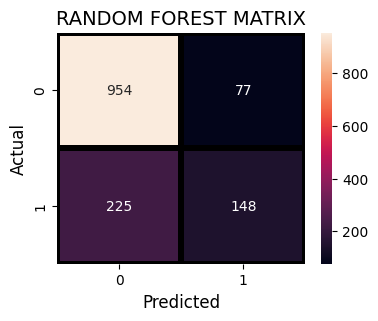

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RANDOM FOREST MATRIX",fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

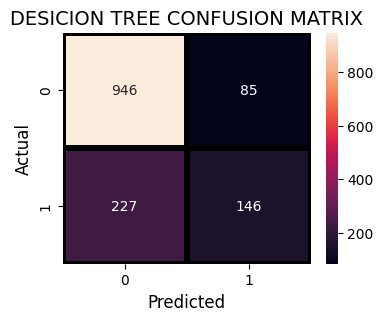

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("DESICION TREE CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

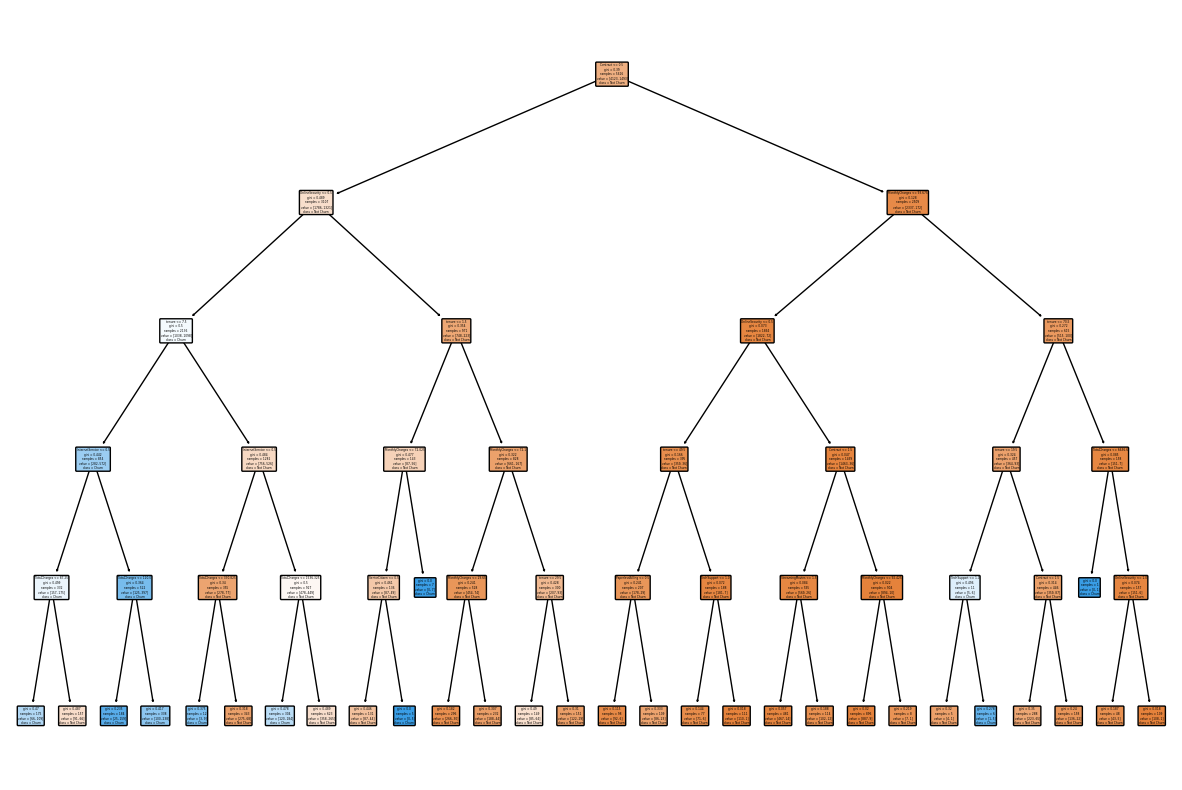

In [ ]:
from sklearn.tree import plot_tree
# Visualisasi pohon keputusan dengan plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

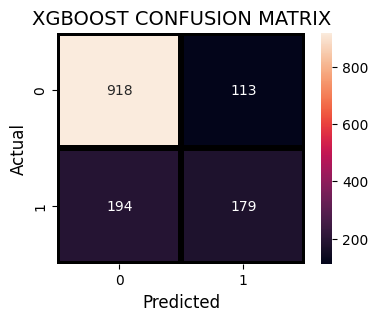

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("XGBOOST CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

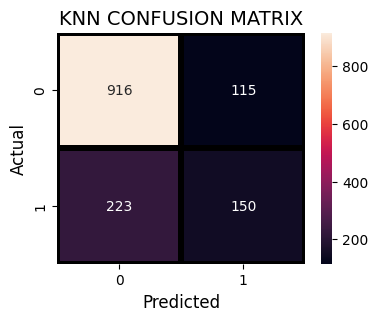

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

-	Dari hasil diatas Tujuannya dari analysis ini adalah untuk memprediksi chustomer churn. dari 4 model klasifikasi yang telah dievaluasi, yaitu K-NN, Decision Tree, Random Forest, dan XGBoost. Masing-masing model memiliki sejumlah metrik evaluasi kinerja yang berbeda, termasuk nilai akurasi, presisi, recall, dan skor F1.

-	Sesuai yang diminta pada soal keberhasilan suatu akurasi ialah >70%, makan dari evaluasi yang telas saya lakukan ialah semua model memenuhi yaitu >70%, yang berarti berhasil. Dengan hasil evaluasinya Random forest accuraccy yang memiliki nilai paling tinggi yaitu 0.784900284

-	Dari hasil confucion matrix pada Random Forest
- True Positive : Hasil prediksi customer yang churn, bernar sebagai customer yang churn ada 954
- True Negative : Hasil prediksi customer yang customer yang tidak churn dan model memprediksi benar bahwa customer tidak churn ada 148
- False Positive : hasil prediksi customers yang tidak churn tetapi model memprediksi bahwa customer churn ada 225
- False Negative : Hasil prediksi customer yang churn tetapi model memprediksi bahwa customer churn ada 77


In [ ]:
#selanjutnya ialah mealkukan future importance untuk mengetahui variable mana yang penting dan berpengaruh
rf_feature_importance = rf_model.feature_importances_
feature_names = X.columns
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
print(rf_feature_importance_df)

             Feature  Importance
14          Contract    0.221944
4             tenure    0.152630
8     OnlineSecurity    0.144403
11       TechSupport    0.118553
18      TotalCharges    0.093521
17    MonthlyCharges    0.076623
7    InternetService    0.065893
9       OnlineBackup    0.032487
16     PaymentMethod    0.030323
10  DeviceProtection    0.015072
15  PaperlessBilling    0.013003
1      SeniorCitizen    0.009244
3         Dependents    0.006701
12       StreamingTV    0.005204
13   StreamingMovies    0.004757
6      MultipleLines    0.004193
2            Partner    0.002231
5       PhoneService    0.001719
0             gender    0.001499


-	Dari hasil diatas Feature Importance dengan hasil paling atas adalah Contract
-	Contract :  Pelanggan yang berlangganan dengan jenis kontrak memiliki dampak yang signifikan terhadap churn nya customer, hal ini bisa dipengaruhi karena kontrak yang kurang menguntungkan untuk pelanggan

-	Tenure : Pelanggan yang telah berlangganan lama juga mempengaruhi churn atau tidaknya. Mungkin saja hal ini terjadi karena pelanggan merasa pelayanan untuk mereka sama saja dengan pelanggan biasa, tidak ada reward atau apapun karena berlangganan lama, dan kualitas Perusahaan semakin menurun


-	Online Security : hal ini bisa terjadi karena mungkin keamanan yang kurang sehingga pelanggan beralih
-	TechSupport : techsupport juga memainkan peran penting dalam mempengaruhi keputusan pelanggan untuk melakukan churn. Dimana jika pelanggan mendapatkan pelayanan dukungan teknis customer lebih puas sehingga tidak terjadi churn


In [ ]:
hasil_prediksi = rf.predict(X_test)
X_test['Churn'] = hasil_prediksi
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1470,0,0,0,0,8.0,1,0,2,1,1,1,1,1,1,0,0,3,19.20,156.85,0
5618,1,0,0,0,11.0,1,0,2,1,1,1,1,1,1,0,0,3,20.35,215.25,0
1178,1,0,0,0,15.0,1,0,1,0,0,2,2,2,2,0,1,2,101.35,1553.95,0
4840,0,1,0,0,43.0,0,1,0,2,2,0,0,0,0,0,1,1,33.45,1500.25,0
5399,0,0,0,0,50.0,1,0,2,1,1,1,1,1,1,1,0,0,19.75,989.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,0,0,0,0,50.0,1,0,1,0,2,0,2,2,2,2,1,3,100.20,5038.45,0
215,0,0,1,0,57.0,0,1,0,2,2,2,0,2,2,0,1,0,58.75,3437.45,0
1119,1,0,1,1,70.0,0,1,0,2,0,2,2,2,2,2,0,0,59.50,4144.80,0
5721,0,0,0,0,27.0,1,0,0,2,2,0,0,0,0,2,0,0,52.85,1498.65,0


In [ ]:
rf_predictions = rf_model.predict(X)
results_df_rf = pd.DataFrame({'Actual': y, 'RF_Predictions': rf_predictions})
print(results_df_rf)

      Actual  RF_Predictions
0          0               1
1          0               0
2          1               0
3          0               0
4          1               1
...      ...             ...
7038       0               0
7039       0               0
7040       0               0
7041       1               1
7042       0               0

[7020 rows x 2 columns]


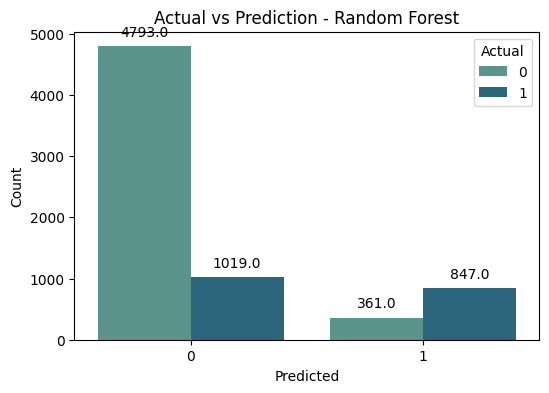

In [ ]:
# Assuming results_df_rf is your DataFrame with 'Actual' and 'RF_Predictions' columns
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='RF_Predictions', hue='Actual', data=results_df_rf, palette='crest')

# Annotate the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Predicted')
plt.ylabel('Count')
plt.title('Actual vs Prediction - Random Forest')
plt.legend(title='Actual', loc='upper right')
plt.show()


-	Pada hasil visualisasi dibawah ini bahwa Customer actual yang